<a href="https://colab.research.google.com/github/SarrahGoddi/projet-DGFiP/blob/main/test_GODDI_Sarrah_fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#!pip install --upgrade tensorflow keras transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer

In [ ]:
class DataExtractor:
    def __init__(self, QR_file_path, fiche_file_path):

        self.QR_file_path = QR_file_path
        self.fiche_file_path = fiche_file_path

        self.data_QR = None
        self.data_fiche = None


        self.data_QR = self.load_csv(self.QR_file_path)
        self.data_fiche = self.load_csv(self.fiche_file_path)



    def load_csv(self, file_path):
        """Charge le fichier CSV dans un DataFrame pandas."""
        try:

            return  pd.read_csv(file_path)



        except Exception as e:
            print(f"Erreur lors de l'ouverture du fichier : {e}")


    def get_column(self, data, nom_c):
        """
        Retourne une colonne sous forme de liste.
        :param column_name: Nom de la colonne à extraire.

        """
        if data is None:
            print("Le fichier CSV n'a pas été chargé correctement.")
            return None
        if nom_c not in data.columns:
            print(f"La colonne '{nom_c}' n'existe pas dans le fichier.")
            return None
        return data[nom_c].tolist()

    def dataset(self):
      """
        Retourne les données sous forme de liste: [[q1, fiche1], ..., [qN, ficheN]]

      """

      # extraction des questions, fiches et classes associées:
      fiches = self.get_column( self.data_fiche, 'Texte')
      questions = self.get_column( self.data_QR, 'question')
      index = self.get_column( self.data_QR, 'num_texte')
      return [[questions[i],fiches[index[i]],index[i] ] for i in range(len(questions))]



In [ ]:
file_path_fiche = '/gdrive/MyDrive/Colab Notebooks/test/info_particulier_impot.csv'
file_path_qr = '/gdrive/MyDrive/Colab Notebooks/test/questions_fiches_fip.csv'
data = extractor = DataExtractor(file_path_qr, file_path_fiche).dataset()


In [ ]:
print("Questions: ",data[0][0])
print('---------------------------------------------------------------------------------')
print("fiche: ",data[0][1])
print("index: ",data[0][2])


Questions:  Quelle obligation subsiste pour un contrat de prêt établi sous seing privé, malgré l'absence d'obligation d'enregistrement pour obtenir une date certaine ?
---------------------------------------------------------------------------------
fiche:  Quels actes faire enregistrer
Vous voulez rédiger un acte constatant :
une cession de parts ;
une cession de biens meubles (mobilier, fonds de commerce, etc.) ;
une reconnaissance de dettes ;
un contrat de prêt.
Ces actes sont des actes sous seing privé, contrairement aux actes authentiques qui sont rédigés par un notaire.
L'enregistrement d'un acte sous seing privé peut être obligatoire ou facultatif selon sa nature.
Retrouvez sur la page contact de ce site, le service compétent pour enregistrer votre acte.
Enregistrement obligatoire ou facultatif
Les cessions d'actions, de parts sociales ou de fonds de commerce doivent obligatoirement être enregistrées.
L'enregistrement de cessions portant sur d’autres types de biens ou de reconna

## statistiques

# Longueur des Questions et des Fiches

In [ ]:
def Plot_longueurs_Q(liste_questions, xlabel,ylabel, title):

  plt.figure(figsize=(10,5))
  counts, bins, patches = plt.hist([len(q.split()) for q in liste_questions], bins=20, alpha=0.7, color='gray',  edgecolor='black')

  total = sum(counts)
  counts_percentage = [(c / total) * 100 for c in counts]

  # Afficher les valeurs en pourcentage sur les barres
  for i in range(len(patches)):
      plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height(),
              f"{counts_percentage[i]:.1f}%", ha="center", fontsize=10, color="black")

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

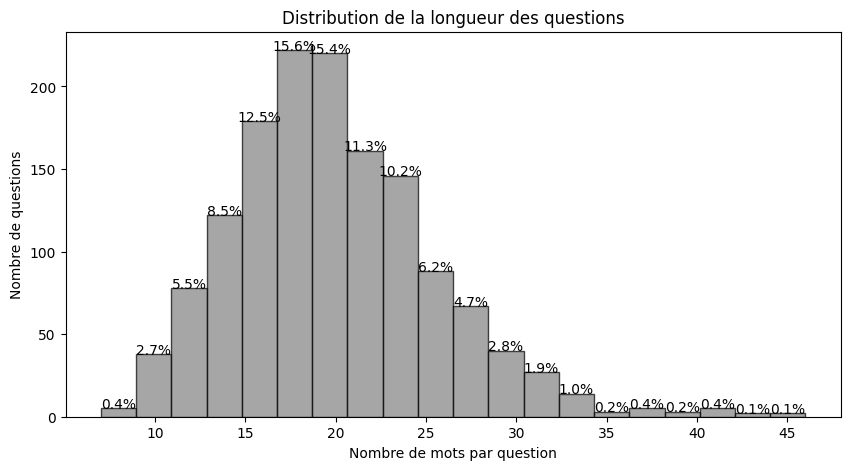

In [ ]:
Plot_longueurs_Q([data[i][0] for i in range(len(data))], "Nombre de mots par question","Nombre de questions", "Distribution de la longueur des questions")


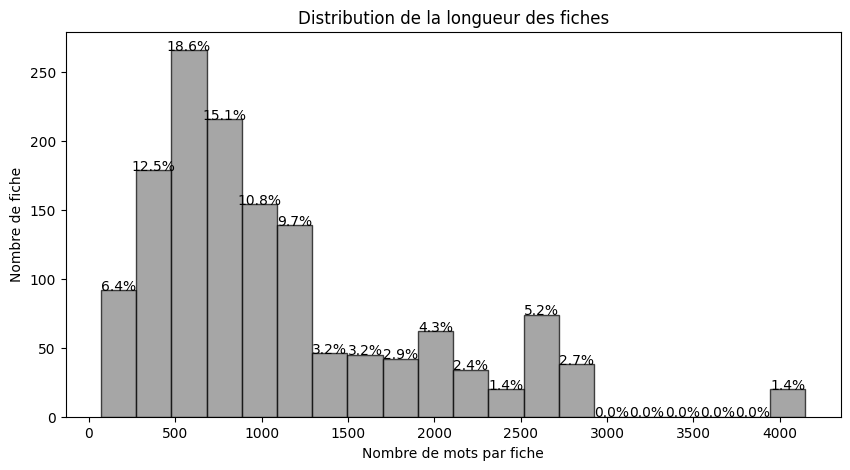

In [ ]:
Plot_longueurs_Q([data[i][1] for i in range(len(data))], "Nombre de mots par fiche","Nombre de fiche", "Distribution de la longueur des fiches")


## Similarité Sémantique entre Questions et Fiches:

In [ ]:
def data_classes(d):
  classes = np.unique(d[:, -1])
  sorted_dict = {classe: d[np.where(d[:, -1] == classe)][:, :-1].tolist() for classe in classes}

  return sorted_dict

### Matrice de Similarité Cosinus avec TF-IDF:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
"""
 Le code utilise TF-IDF pour vectoriser les textes et calcule la similarité cosinus entre questions et fiches.
 Le heatmap permet de visualiser quelles fiches sont les plus proches des questions.
 il faut revoir la méthode de vectorisation si les valeurs sont -.
 Possible amélioration : Passer à Sentence-BERT ou Dense Passage Retrieval (DPR) pour une meilleure recherche sémantiqu
"""

def Semantic_similarity_TFIDF(data_q, data_fiche):

  # Vectorisation des questions et fiches
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(data_q + data_fiche)

  # Calcul de la similarité cosinus
  sim_matrix = cosine_similarity(X[:len(data_q)], X[len(data_q):])

  plt.figure(figsize=(10,7))
  sns.heatmap(sim_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False)
  plt.xlabel("Fiches")
  plt.ylabel("Questions")
  plt.title("Matrice de Similarité Cosinus entre Questions et Fiches")
  plt.show()

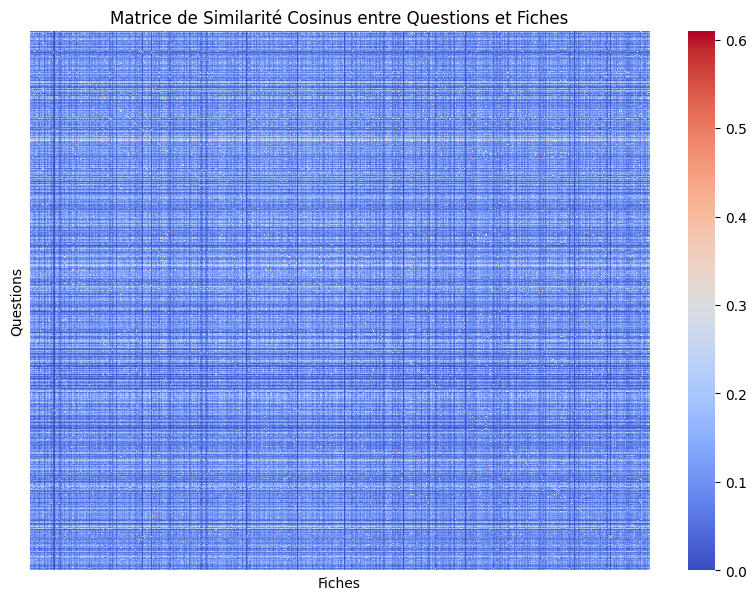

In [ ]:
Semantic_similarity_TFIDF([data[i][0] for i in range(len(data))], [data[i][1] for i in range(len(data))])

### Similarité  Cosinus entre les questions et les fiches avec Sentence-BERT



In [ ]:
#from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import CamembertModel, CamembertTokenizer



def Semantic_similarity_SBERT(data_classes, model):

  '''
  # Génération des embeddings
  embeddings_questions = model.encode(data_q, convert_to_tensor=True)
  embeddings_fiches = model.encode(data_fiche, convert_to_tensor=True)

  # Calcul de la similarité cosinus
  sim_matrix = cosine_similarity(embeddings_questions.cpu().numpy(), embeddings_fiches.cpu().numpy())

  # Affichage du heatmap
  plt.figure(figsize=(10,7))
  sns.heatmap(sim_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False)
  plt.xlabel("Fiches")
  plt.ylabel("Questions")
  plt.title("Matrice de Similarité Cosinus entre Questions et Fiches (SBERT)")
  plt.show()
  '''

  phrase_0 = [data_classes['0'][i][0] for i in range(len(data_classes['0']))] # phrases pour les calc de distance
  fiches_comp = [[data_classes['0'][i][1] for i in range(len(data_classes['0']))]  ,[data_classes['1'][i][1] for i in range(len(data_classes['1']))]  ,[data_classes['2'][i][1] for i in range(len(data_classes['2']))] ,[data_classes['3'][i][1] for i in range(len(data_classes['3']))]  , [data_classes['4'][i][1] for i in range(len(data_classes['4']))] ]
  couleurs = ["blue", "red", "green", 'gray','orange']
  legende = ['fiche 0', 'fiche 1', 'fiche 2', 'fiche 3', 'fiche 4']
  plt.figure(figsize=(10,7))

  for i in range(len(fiches_comp)):
    embeddings_questions = model.encode(phrase_0 , convert_to_tensor=True)
    embeddings_fiches = model.encode(fiches_comp[i], convert_to_tensor=True)

    # Calcul de la similarité cosinus
    sim_matrix = cosine_similarity(embeddings_questions.cpu().numpy(), embeddings_fiches.cpu().numpy())
    sns.kdeplot(sim_matrix, color= couleurs[i], fill=True, linewidth=2)
  plt.xlabel("Valeur de Similarité Cosinus ")
  plt.ylabel("Densité")
  plt.title("Distribution en Courbe des Similarités Cosinus, Sentence-BERT ")
  plt.grid(True)
  plt.legend()
  plt.show()





In [ ]:
data_dic_c= data_classes(np.array(data))




/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-10-bb581eb69d3d>:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


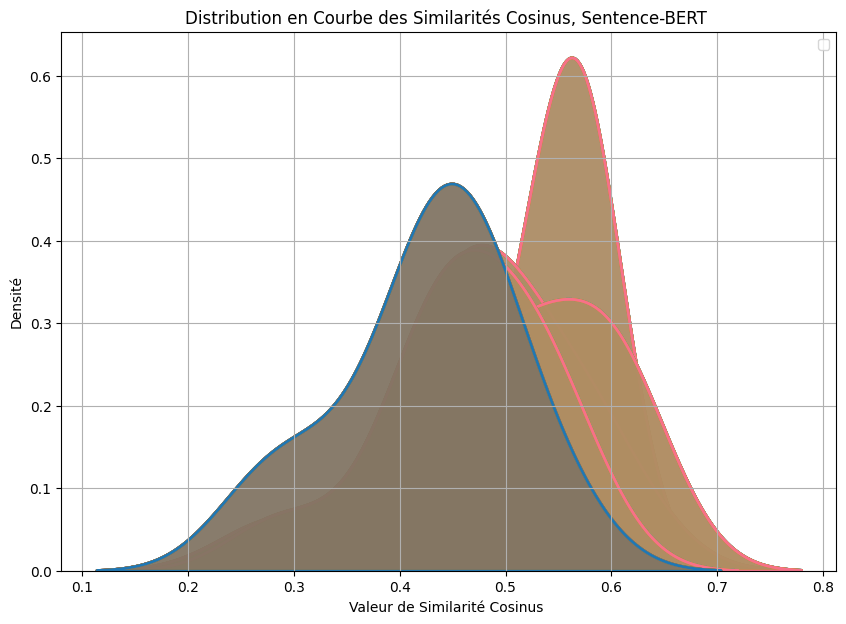

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
Semantic_similarity_SBERT(data_dic_c, model)

### similarité cosinus entre les questions, tokenisation avec CamemBERT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import CamembertTokenizer, CamembertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def encode_sentences(d, model, tokenizer):
    embeddings = []
    for q in d:
        inputs = tokenizer(q, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        embeddings.append(embedding)
    return np.array(embeddings)


def compute_cosine_similarities(d,model,tokenizer):
    embeddings = encode_sentences(d, model, tokenizer)

    similarity_m = cosine_similarity(embeddings)


    sim = []
    for i in range(len(d)):
        for j in range(i + 1, len(d)):


          sim.append(similarity_m[i, j])

    return sim

def plot_similarity_boxplot(model,tokenizer, cat1, cat2, cat3,cat4,cat5, cat6, cat7,cat8):

    data = [compute_cosine_similarities(cat1, model, tokenizer),compute_cosine_similarities(cat2, model, tokenizer), compute_cosine_similarities(cat3, model, tokenizer),
            compute_cosine_similarities(cat4, model, tokenizer),compute_cosine_similarities(cat5, model,tokenizer),compute_cosine_similarities(cat6, model, tokenizer), compute_cosine_similarities(cat7, model, tokenizer), compute_cosine_similarities(cat8, model, tokenizer)]
    labels = ["catégorie fiche 1", "catégorie fiche2", "catégorie fiche3", "catégorie fiche4", "catégorie fiche5", "catégorie fiche6", "catégorie fiche7", "catégorie fiche8"]

    plt.figure(figsize=(18, 6))
    sns.boxplot(data=data)

    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.ylabel("Similarité cosinus")
    plt.title("Distribution des similarités cosinus par catégorie")
    plt.show()

Some weights of CamembertModel were not initialized from the model checkpoint at camembert/camembert-base-wikipedia-4gb and are newly initialized: ['roberta.embeddings.word_embeddings.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


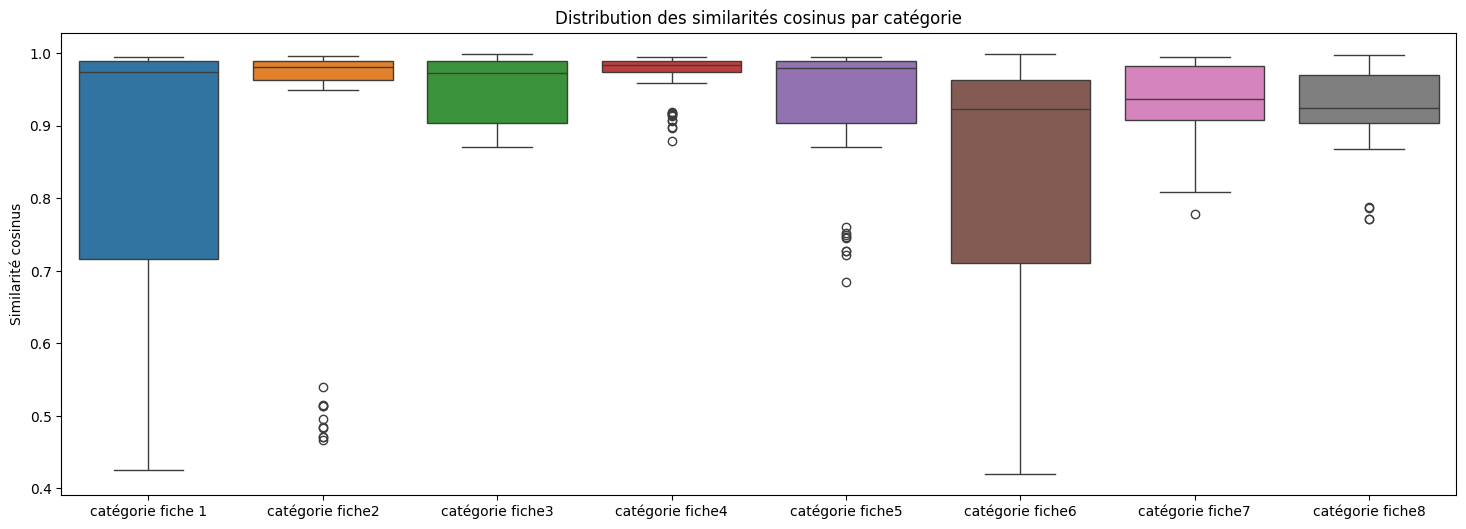

In [ ]:
# Définition des phrases
q_categorie_fiche1 = [data_dic_c['0'][i][0] for i in range(len(data_dic_c['0']))]

q_categorie_fiche2 = [data_dic_c['1'][i][0] for i in range(len(data_dic_c['1']))]
q_categorie_fiche3 = [data_dic_c['2'][i][0] for i in range(len(data_dic_c['2']))]
q_categorie_fiche4 = [data_dic_c['3'][i][0] for i in range(len(data_dic_c['3']))]
q_categorie_fiche5 = [data_dic_c['4'][i][0] for i in range(len(data_dic_c['4']))]
q_categorie_fiche6 = [data_dic_c['5'][i][0] for i in range(len(data_dic_c['5']))]
q_categorie_fiche7 = [data_dic_c['6'][i][0] for i in range(len(data_dic_c['6']))]
q_categorie_fiche8 = [data_dic_c['7'][i][0] for i in range(len(data_dic_c['7']))]
model_CamemBERT = CamembertModel.from_pretrained("camembert/camembert-base-wikipedia-4gb")
tokenizer = CamembertTokenizer.from_pretrained("camembert/camembert-base-wikipedia-4gb")


# Affichage du graphique
plot_similarity_boxplot(model_CamemBERT,tokenizer,q_categorie_fiche1, q_categorie_fiche2, q_categorie_fiche3,q_categorie_fiche4,q_categorie_fiche5, q_categorie_fiche6,
                        q_categorie_fiche7, q_categorie_fiche8)

### UMAP afin de visualiser si les questions de différentes fiches sont éloignées dans l'espace des embeddings extraits avec CamemBERT

In [ ]:
import umap
from sklearn.metrics.pairwise import cosine_similarity
# Fonction de projection avec UMAP
def plot_umap_projection(data_dic_c, model,tokenizer):


    all_embeddings = []
    category_labels = []

    # Extraction des questions par catégorie
    categories = sorted(data_dic_c.keys())  # Trie les catégories pour cohérence
    for cat in categories:
        questions = [data_dic_c[cat][i][0] for i in range(len(data_dic_c[cat]))]
        embeddings = encode_sentences(questions, model, tokenizer)
        all_embeddings.append(embeddings)
        category_labels.extend([f"Catégorie {cat}"] * len(questions))

    all_embeddings = np.vstack(all_embeddings)

    # Calcul de la matrice de similarité cosinus
    similarity_matrix = cosine_similarity(all_embeddings)

    # Réduction de dimension avec UMAP basé sur la similarité cosinus
    reducer = umap.UMAP(n_components=2, metric="cosine", random_state=42)
    reduced_embeddings = reducer.fit_transform(1 - similarity_matrix)


    # Affichage du scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=category_labels, palette="tab10")
    plt.title("Projection UMAP des embeddings CamemBERT")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend(title="Catégories")
    plt.show()


config.json:   0%|          | 0.00/455 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertModel were not initialized from the model checkpoint at camembert/camembert-base-wikipedia-4gb and are newly initialized: ['roberta.embeddings.word_embeddings.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


sentencepiece.bpe.model:   0%|          | 0.00/793k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


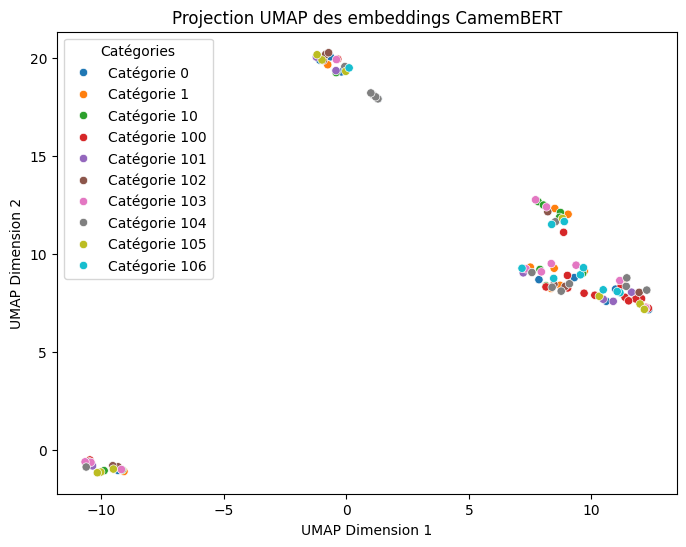

In [ ]:
selected_keys = list(data_dic_c.keys())[:10]
selected_data = {key: data_dic_c[key] for key in selected_keys}
model_CamemBERT = CamembertModel.from_pretrained("camembert/camembert-base-wikipedia-4gb")
tokenizer = CamembertTokenizer.from_pretrained("camembert/camembert-base-wikipedia-4gb")
plot_umap_projection(selected_data,model_CamemBERT,tokenizer)
#Met en avant les similarités entre phrases (cosinus similarité) appartenant à des fiches différentes

# Similarité textuelle sémantique complète à l'aide de phrases siamoises







###géneration de la base de données:

- un couple de questions.
- labels: définie sur 1 si question1 et question2 ont une signification proches, et 0 sinon.

- On considére que les questions appartenant à la meme fiche sont similaire


In [ ]:
from itertools import product
def generate_question_dataframe():

    return pd.DataFrame(columns=["Question 1", "Question 2", "Labels", "Num_fiche_q1", "Num_fiche_q2"])

def add_row_to_dataframe(df, question1, question2, label, n1, n2):
    new_row = pd.DataFrame({"Question 1": [question1], "Question 2": [question2], "Labels": [label],
                           "Num_fiche_q1": [n1], "Num_fiche_q2": [n2] })
    # Utilisez pd.concat pour ajouter la nouvelle ligne au DataFrame
    df = pd.concat([df, new_row], ignore_index=True)
    return df

def generate_all_combinations(lists):
    combinations = []
    for i in range(len(lists)):
        for j in range(i+1, len(lists)):
            for pair in product(lists[i], lists[j]):
                combinations.append(pair)

    return combinations
def generate_dataframe(d):
  df = generate_question_dataframe()
  l = []
  l_sim = []
  for c, v in d.items():

    data_s= [d[c][i][0] for i in range(len(d[c]))] # questions
    data_ss =  [ (d[c][i][0] , c)for i in range(len(d[c]))] # questions
    l.append(data_ss)

    for i in range(len(data_s)): # génération de couples de questions appartenant à la même fiche
        for j in range(i + 1, len(data_s)):

          df = add_row_to_dataframe(df, data_s[i], data_s[j], 1, c, c)

  data_dis = generate_all_combinations(l) [0:len(df)]


  for i in range(len(data_dis)):
    df = add_row_to_dataframe(df, data_dis[i][0][0], data_dis[i][1][0],0,data_dis[i][0][1],data_dis[i][1][1] )
  df.to_csv('/gdrive/MyDrive/Colab Notebooks/test/data.csv', index=False)
  return df


In [ ]:
selected_keys = list(data_dic_c.keys())[:30]
selected_data = {key: data_dic_c[key] for key in selected_keys}
data = generate_dataframe(selected_data)


In [ ]:
len(data)

3026

In [ ]:
data

,Question 1,Question 2,Labels,Num_fiche_q1,Num_fiche_q2
0,Que permet d'obtenir l'avis d'impôt sur le rev...,Qu'est-ce que la déclaration automatique propo...,1,0,0
1,Que permet d'obtenir l'avis d'impôt sur le rev...,Que se passe-t-il si vous n'êtes pas en mesure...,1,0,0
2,Que permet d'obtenir l'avis d'impôt sur le rev...,Dans quelles conditions pouvez-vous déclarer v...,1,0,0
3,Que permet d'obtenir l'avis d'impôt sur le rev...,Quelle est la période de dépôt pour la déclara...,1,0,0
4,Que permet d'obtenir l'avis d'impôt sur le rev...,Qui doit souscrire une déclaration de revenus ...,1,0,0
...,...,...,...,...,...
3021,À quel centre des finances publiques devez-vou...,Comment s’applique le calcul des frais supplém...,0,0,11
3022,Quelle est la conséquence du non-dépôt de la d...,Dans quel cas un salarié est-il autorisé à déd...,0,0,11
3023,Quelle est la conséquence du non-dépôt de la d...,Quel montant fixe l’administration pour la val...,0,0,11
3024,Quelle est la conséquence du non-dépôt de la d...,Dans quelle limite la valeur d’un repas pris a...,0,0,11


### pré-traitement:
- Suppression des ponctuations et des mots vides
- Lemmatisation
- Tokenisation


In [ ]:
import re
def clean_data(x):
    if not isinstance(x, str):  # Vérifie que x est bien une chaîne
        return ""

    text = re.sub(r'\s+', ' ', x).strip()  # Remplace multiples espaces
    text = text.lower()  # Convertit en minuscule
    return text

In [ ]:
from transformers import CamembertTokenizer
def Tokenization(name_model):
  return CamembertTokenizer.from_pretrained(name_model)

In [ ]:
def tokenize_text(name_model,text,  max_length):
    tokenize = Tokenization(name_model)

    encode_out = tokenize.batch_encode_plus( text.tolist(),
                                    add_special_tokens=True,
                                    max_length= max_length,
                                    padding=True,
                                    truncation=True,
                                    return_attention_mask=True,
                                    return_tensors="tf")

    return {
         "input_ids": np.array(encode_out.get('input_ids'), dtype="int32") ,
         "attention_masks": np.array(encode_out.get('attention_mask'), dtype="int32")
    }

In [ ]:
# Application au DataFrame (inchangée)
data['Question1_traitement'] = data['Question 1'].apply(clean_data)
data['Question2_traitement'] = data['Question 2'].apply(clean_data)

### separation des données en train, test et validation:


In [ ]:
from sklearn.model_selection import train_test_split
def split_data(X,Y, size_validation):
    X_train, X_validation, Y_train, Y_validation  = train_test_split(X, Y, test_size=size_validation, random_state=0)
    return  X_train, X_validation, Y_train, Y_validation


In [ ]:
x = data[['Question1_traitement', 'Question2_traitement', "Num_fiche_q1","Num_fiche_q2"]]
y = data["Labels"]
X_train_v, X_test_df,Y_train_v, Y_test_df = split_data(x,y,0.3)
X_train_df,X_validation_df, Y_train_df, Y_validation_df = split_data(X_train_v ,Y_train_v,0.3)

In [ ]:
np.unique(np.array(list(Y_train_df)), return_counts=True)

(array([0, 1]), array([757, 725]))

In [ ]:
X_train_df

,Question1_traitement,Question2_traitement,Num_fiche_q1,Num_fiche_q2
577,comment pouvez-vous signaler une erreur à l'ad...,quel service est destiné à la correction d'une...,106,106
1608,à quel centre des finances publiques devez-vou...,en cas de décès d’un des conjoints en cours d’...,0,1
88,quel est le délai maximal pour signaler aux se...,quelle est la règle générale pour le nombre de...,1,1
266,où sont publiés les paramètres départementaux ...,quels locaux sont exclus de la révision des va...,100,100
1569,qui doit souscrire une déclaration de revenus ...,un enfant célibataire et mineur peut-il être i...,0,1
...,...,...,...,...
1594,quel rôle joue le prélèvement à la source dans...,comment doivent déclarer leurs revenus deux pe...,0,1
1479,si un contribuable fait appel à un salarié pou...,dans le cadre de l’emploi à domicile pour un a...,23,23
2563,que se passe-t-il si vous n'êtes pas en mesure...,à quel moment est-il possible de régulariser u...,0,106
2529,quel formulaire devez-vous utiliser pour décla...,le droit à l’erreur permet-il de régulariser u...,0,105


### Tokenisation:

In [ ]:
# etude de la distribution de la taille des questions pour determiner max_length
X_train_1_tokenize = tokenize_text("camembert/camembert-base-wikipedia-4gb", X_train_df['Question1_traitement'],  50)
X_train_2_tokenize = tokenize_text("camembert/camembert-base-wikipedia-4gb", X_train_df['Question2_traitement'],  50)
X_test_1_tokenize = tokenize_text("camembert/camembert-base-wikipedia-4gb", X_test_df['Question1_traitement'],  50)
X_test_2_tokenize = tokenize_text("camembert/camembert-base-wikipedia-4gb", X_test_df['Question2_traitement'],  50)
X_validation_1_tokenize = tokenize_text("camembert/camembert-base-wikipedia-4gb", X_validation_df['Question1_traitement'],  50)
X_validation_2_tokenize = tokenize_text("camembert/camembert-base-wikipedia-4gb", X_validation_df['Question2_traitement'],  50)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:

X_train = (np.array(X_train_1_tokenize['input_ids'], dtype="int32"),
           np.array(X_train_1_tokenize['attention_masks'], dtype="int32"),
           np.array(X_train_2_tokenize['input_ids'], dtype="int32"),
           np.array(X_train_2_tokenize['attention_masks'], dtype="int32"))
X_test = (np.array(X_test_1_tokenize['input_ids'], dtype="int32"),
          np.array(X_test_1_tokenize['attention_masks'], dtype="int32"),
          np.array(X_test_2_tokenize['input_ids'], dtype="int32"),
          np.array(X_test_2_tokenize['attention_masks'], dtype="int32"))
X_validation = (np.array(X_validation_1_tokenize['input_ids'], dtype="int32"),
                np.array(X_validation_1_tokenize['attention_masks'], dtype="int32"),
                np.array(X_validation_2_tokenize['input_ids'], dtype="int32"),
                np.array(X_validation_2_tokenize['attention_masks'], dtype="int32"))
Y_train = Y_train_df.astype("float32")
Y_test = Y_test_df.astype("float32")
Y_validation = Y_validation_df.astype("float32")


### Modele: Sentence-BERT

In [ ]:
import tensorflow as tf

#La classe L1Dist définit une couche personnalisée pour calculer la distance L1 (distance de Manhattan)
#entre deux embeddings de phrases générés par Sentence-BERT (SBERT) dans un modèle Siamese.
#Dans une architecture Siamese, l'objectif est d'apprendre une fonction de similarité entre deux entrées. La distance L1 est couramment utilisée car :

#- Elle est robuste aux valeurs extrêmes comparée à la distance euclidienne (L2).
#- Elle conserve l’interprétabilité : plus la distance est faible, plus les phrases sont similaires.
#- Elle est utilisée comme entrée d’un classificateur dense pour faire une prédiction de similarité.
class L1Dist(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, input1, input2):
        return tf.math.abs(input1 - input2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D, Layer
from tensorflow.keras.models import Model
from transformers import TFBertModel

# Création d'une couche personnalisée pour encapsuler BERT
class BertLayer(Layer):
    def __init__(self, model_checkpoint, **kwargs):
        super(BertLayer, self).__init__(**kwargs)

        self.bert = TFBertModel.from_pretrained("camembert/camembert-base-wikipedia-4gb")
        self.bert.trainable = False  # On fige BERT
        # Ajout explicite des poids non-entraînables
        for param in self.bert.weights:
            param._trainable = False




    def call(self, inputs):
        """Prend en entrée un dictionnaire et renvoie les embeddings BERT"""
        outputs = self.bert(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])
        return outputs.last_hidden_state  # On récupère les embeddings de la dernière couche


#  Création du modèle fonctionnel
def build_siamese_bert(model_checkpoint="bert-base-uncased"):
    # Définition des entrées
    input_ids1 = Input(shape=(50,), dtype=tf.int32, name="input_ids1")
    attention_masks1 = Input(shape=(50,), dtype=tf.int32, name="attention_masks1")
    input_ids2 = Input(shape=(50,), dtype=tf.int32, name="input_ids2")
    attention_masks2 = Input(shape=(50,), dtype=tf.int32, name="attention_masks2")

    # Ajouter la couche BERT encapsulée
    bert_layer = BertLayer(model_checkpoint)
    # Initialisation de la couche L1Dist
    l1_dist_layer = L1Dist()

    # Passage dans BERT
    bert_output1 = bert_layer({"input_ids": input_ids1, "attention_mask": attention_masks1})
    bert_output2 = bert_layer({"input_ids": input_ids2, "attention_mask": attention_masks2})

    # Pooling
    pooled_output1 = GlobalAveragePooling1D()(bert_output1)
    pooled_output2 = GlobalAveragePooling1D()(bert_output2)


    distance_output = l1_dist_layer(pooled_output1, pooled_output2)


    # Couches de classification
    dense_output = Dense(512, activation="relu")(distance_output)
    output = Dense(1, activation="sigmoid")(dense_output)

    # Création du modèle
    model = Model(
        inputs=[input_ids1, attention_masks1, input_ids2, attention_masks2],
        outputs=output
    )

    return model

#  Instanciation et compilation du modèle
siamese_bert = build_siamese_bert()

for layer in siamese_bert.layers:
    if "bert_layer" in layer.name:
        layer.trainable = False

# Affichage du modèle
siamese_bert.summary()
siamese_bert.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

You are using a model of type camembert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['roberta.encoder.layer.6.attention.self.query.bias', 'roberta.encoder.layer.7.attention.self.value.bias', 'roberta.encoder.layer.5.attention.self.query.bias', 'roberta.encoder.layer.2.output.dense.bias', 'roberta.encoder.layer.11.attention.self.value.bias', 'roberta.encoder.layer.9.output.LayerNorm.bias', 'roberta.encoder.layer.3.output.dense.weight', 'roberta.encoder.layer.5.attention.self.value.weight', 'roberta.encoder.layer.6.attention.output.dense.bias', 'roberta.encoder.layer.9.attention.output.LayerNorm.bias', 'roberta.encoder.layer.5.attention.self.key.weight', 'roberta.encoder.layer.7.output.LayerNorm.weight', 'roberta.encoder.layer.1.attention.output.dense.weight', 'roberta.encoder.layer.2.attention.self.query.bias', 'roberta.enc

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ attention_masks1          │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids1 (InputLayer)   │ (None, 50)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_masks2          │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids2 (InputLayer)   │ (None, 50)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 50, 768)        │              0 │ attention_masks1[0][0… │
│                           │                        │                │ input_ids1[0][0],      │
│                           │                        │                │ attention_masks2[0][0… │
│                           │                        │                │ input_ids2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 768)            │              0 │ bert_layer[0][0]       │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 768)            │              0 │ bert_layer[1][0]       │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist (L1Dist)          │ (None, 768)            │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │        393,728 │ l1_dist[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            513 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 394,241 (1.50 MB)

 Trainable params: 394,241 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in siamese_bert.layers:
    print(f"{layer.name}: Trainable = {layer.trainable}")

attention_masks1: Trainable = True
input_ids1: Trainable = True
attention_masks2: Trainable = True
input_ids2: Trainable = True
bert_layer: Trainable = False
global_average_pooling1d: Trainable = True
global_average_pooling1d_1: Trainable = True
l1_dist: Trainable = True
dense: Trainable = True
dense_1: Trainable = True


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.0000001)

### Fine-tuning du modèle siamese bert

In [ ]:
BATCH_SIZE = 32
EPOCHS = 18 #5

history = siamese_bert.fit(
    X_train,
    Y_train,
    validation_data=(X_validation, Y_validation),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[earlystopping,
               learning_rate_reduction]
)

Epoch 1/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 834ms/step - accuracy: 0.4713 - loss: 0.6987 - val_accuracy: 0.5503 - val_loss: 0.6887 - learning_rate: 1.0000e-05
Epoch 2/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 215ms/step - accuracy: 0.5082 - loss: 0.6903 - val_accuracy: 0.5755 - val_loss: 0.6825 - learning_rate: 1.0000e-05
Epoch 3/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.5393 - loss: 0.6849 - val_accuracy: 0.5802 - val_loss: 0.6768 - learning_rate: 1.0000e-05
Epoch 4/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.5647 - loss: 0.6727 - val_accuracy: 0.6006 - val_loss: 0.6720 - learning_rate: 1.0000e-05
Epoch 5/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.5909 - loss: 0.6744 - val_accuracy: 0.6352 - val_loss: 0.6676 - learning_rate: 1.0000e-05
Epoch 6/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.5937 - loss: 0.6673 - val_accuracy: 0.6431 - val_loss: 0.6620 - learning_rate: 1.0000e-05
Epoch 7/18
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 223ms/step - acc

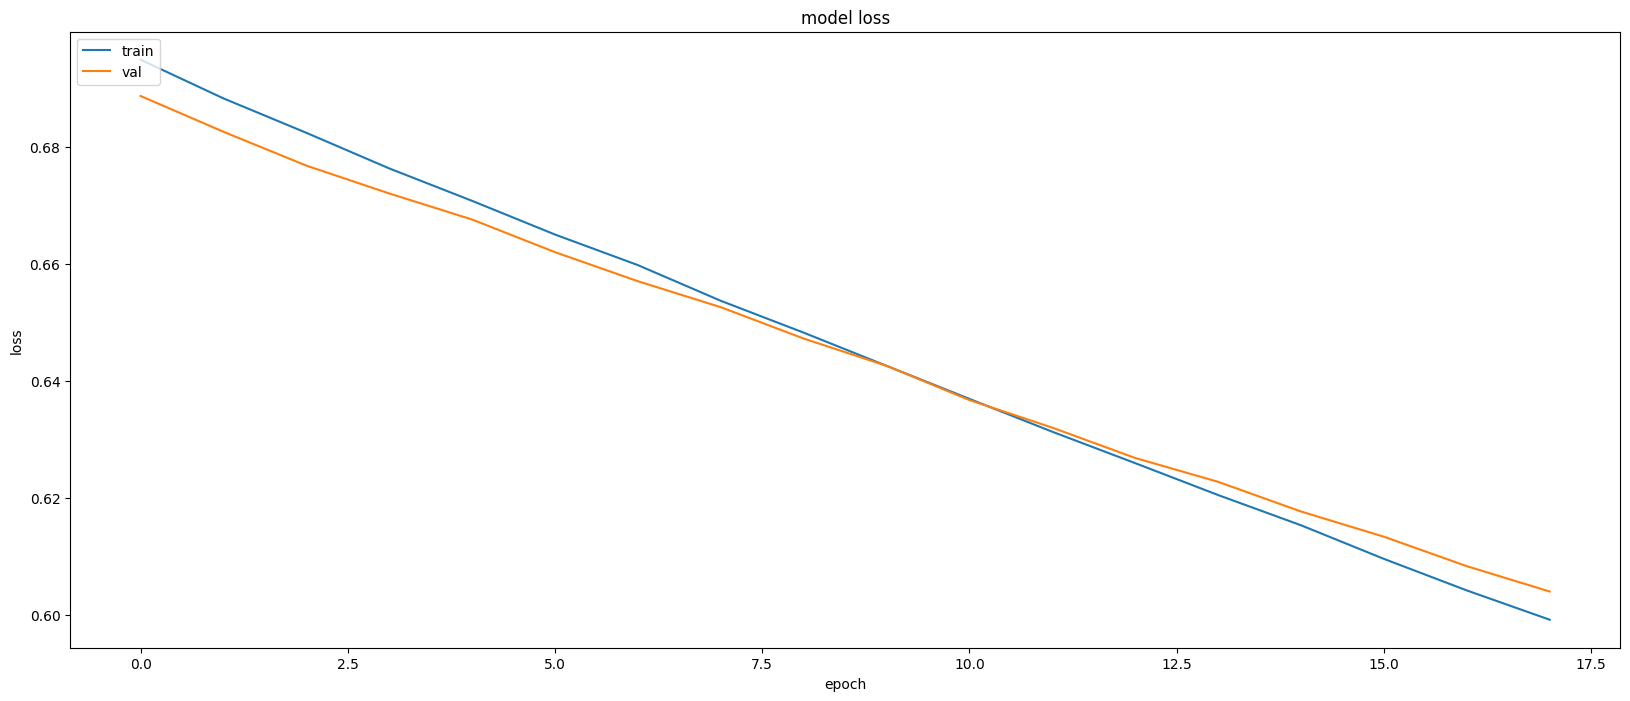

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

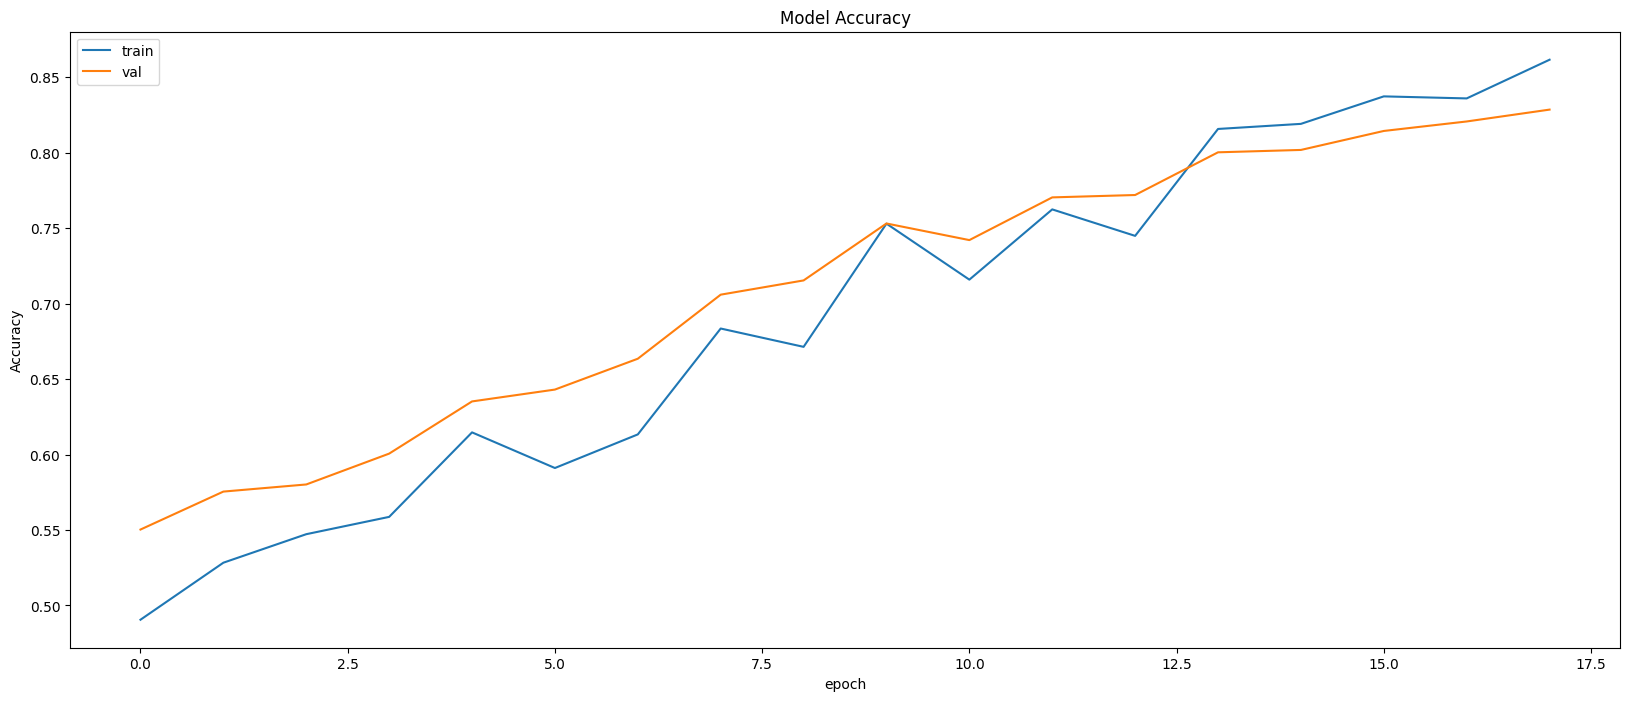

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Evaluation du modèle de classification des paires de questions

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def evaluate_model(model, X_test, Y_test, lim,batch_size=32, is_multiclass=False):

    #Fait l'inférence et affiche les métriques de performance.
    Y_pred = model.predict(X_test, batch_size=batch_size)

    if is_multiclass:
        Y_pred_class = np.argmax(Y_pred, axis=1)
    else:
        Y_pred_class = (Y_pred > lim).astype(int)
        Y_pred_class = Y_pred_class.flatten()

    print("\nÉvaluation :")
    print("Accuracy :", accuracy_score(Y_test, Y_pred_class))
    print(classification_report(Y_test, Y_pred_class))

    return Y_pred, Y_pred_class

In [ ]:
pred_prob, Y_pred = evaluate_model(siamese_bert, X_test, Y_test,0.5, is_multiclass=False)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step

Évaluation :
Accuracy : 0.8094713656387665
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       414
         1.0       0.86      0.78      0.82       494

    accuracy                           0.81       908
   macro avg       0.81      0.81      0.81       908
weighted avg       0.81      0.81      0.81       908



### Prediction de la fiche pratique
- On suppose la question 2 le consensus pour le choix de la fiche pratique.

In [ ]:
def label_fiche_question_consensus(X_t_df, Y_p, Y_v):
  L_num_fiche_q1_pred = []
  L_num_fiche_q1_ver = []

  for i in range(len(X_t_df)):
    row = X_t_df.iloc[i]
    Y =[ int(Y_test.values[i]) for i in range(len(Y_test.values))]
    if Y_p[i] == 1 and Y[i] ==1:
        # prediction de la fiche :
        L_num_fiche_q1_pred.append(row['Num_fiche_q2'])

        L_num_fiche_q1_ver.append(row['Num_fiche_q1'])
  X_t_df['label_pred'] = Y_p


  #X_t_df['Num_fiche_q1_pred'] =  L_num_fiche_q1_pred

  print('pred',L_num_fiche_q1_pred)
  print('ver',L_num_fiche_q1_ver)


  acc = accuracy_score(L_num_fiche_q1_ver,   L_num_fiche_q1_pred)
  return  acc



In [ ]:
def prediction_fiches(model, X_t, X_t_df, Y_t, lim):
  pred_prob, Y_p= evaluate_model(model, X_t, Y_t, lim,batch_size=32, is_multiclass=False)
  accuracy = label_fiche_question_consensus(X_t_df,  Y_p, Y_t)
  return accuracy

In [ ]:
 prediction_fiches(siamese_bert, X_test,X_test_df, Y_test,0.5)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step

Évaluation :
Accuracy : 0.8006607929515418
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81       414
         1.0       0.91      0.70      0.79       494

    accuracy                           0.80       908
   macro avg       0.82      0.81      0.80       908
weighted avg       0.83      0.80      0.80       908

pred [np.str_('110'), np.str_('105'), np.str_('14'), np.str_('110'), np.str_('104'), np.str_('2'), np.str_('105'), np.str_('13'), np.str_('2'), np.str_('109'), np.str_('100'), np.str_('15'), np.str_('101'), np.str_('21'), np.str_('2'), np.str_('104'), np.str_('22'), np.str_('108'), np.str_('11'), np.str_('112'), np.str_('17'), np.str_('104'), np.str_('23'), np.str_('104'), np.str_('108'), np.str_('13'), np.str_('108'), np.str_('101'), np.str_('15'), np.str_('22'), np.str_('10'), np.str_('101'), np.str_('17'), np.str_('13'), np.str_('104'), np.str_('14'), np.str_('112'), np.str_('10

1.0

In [ ]:
X_test_df

,Question1_traitement,Question2_traitement,Num_fiche_q1,Num_fiche_q2,Num_fiche_q1_pred,label_pred
2161,qu'est-ce que la déclaration automatique propo...,la tsbcs est-elle due pour seulement une parti...,0,103,99999,0
2990,qui doit souscrire une déclaration de revenus ...,comment doit être prise en compte la valeur d’...,0,11,99999,0
2189,quelle est la période de dépôt pour la déclara...,où devez-vous déposer la déclaration tsbcs et ...,0,103,99999,0
10,qu'est-ce que la déclaration automatique propo...,que se passe-t-il si vous n'êtes pas en mesure...,0,0,99999,0
1850,quels éléments la déclaration des revenus perm...,quel est l'objectif principal du dispositif de...,0,100,99999,0
...,...,...,...,...,...,...
1654,que se passe-t-il si vous n'êtes pas en mesure...,quels justificatifs peut-on vous demander pour...,0,10,10,1
1280,lors de la première connexion pour déclarer en...,comment l’usager obtient-il un premier accès à...,2,2,2,1
2100,quel rôle joue le prélèvement à la source dans...,que se passe-t-il en cas de dépôt tardif de la...,0,102,99999,0
2082,qui doit souscrire une déclaration de revenus ...,quels locaux sont concernés par la déclaration...,0,102,99999,0


from matplotlib import pyplot as plt
X_test_df['label_pred'].plot(kind='hist', bins=20, title='label_pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_test_df['label_pred'].plot(kind='line', figsize=(8, 4), title='label_pred')
plt.gca().spines[['top', 'right']].set_visible(False)